In this notebook, we analyse the results obtained by carrying out "Experiment 2"
as described in the paper. To repeat the experiment, execute script **exp2.py**.
It will save many files in folder *results/exp2*.
Running this notebook permits to create many plots in folder *results/plots*.

Let us begin by importing the necessary libraries and by constructing the environment.

In [14]:
from environment import *
from algorithm import *
from data.data import *
from utils import *

# get environment, SG utilities, and participants' policies
M, utilities, policies = construct_env_utilities_and_policies()

# initialize path variables
utils = ['sqrt','square','linear']
alphas = ['0.01', '0.5', '5', '100', '1000', '10000']
seeds = ['0','1','2','3','4']
path = 'results/exp2/'

# Plot 1: Compare the utilities extracted based on the initial utility

For a specific seed, for every learning rate alpha,
we plot the final utilities extracted depending on the initial utility adopted.

step size: 0.01
suboptimalities: ['U_sqrt, 0.36', 'U_square, 0.25', 'U_linear, 0.41']


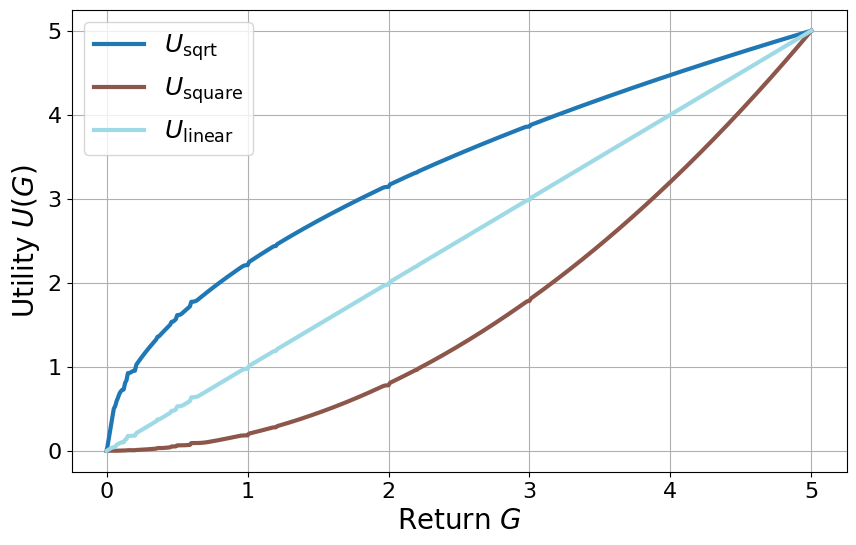

step size: 0.5
suboptimalities: ['U_sqrt, 0.18', 'U_square, 0.16', 'U_linear, 0.24']


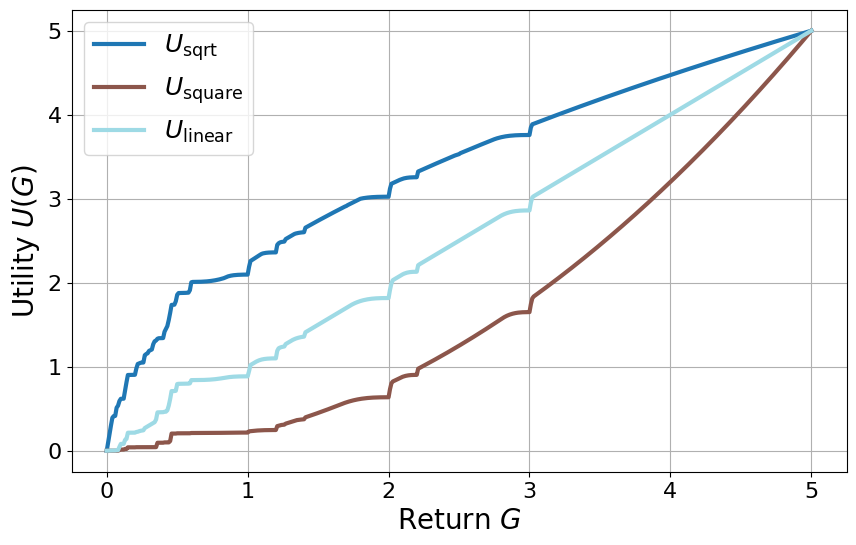

step size: 5
suboptimalities: ['U_sqrt, 0.11', 'U_square, 0.08', 'U_linear, 0.12']


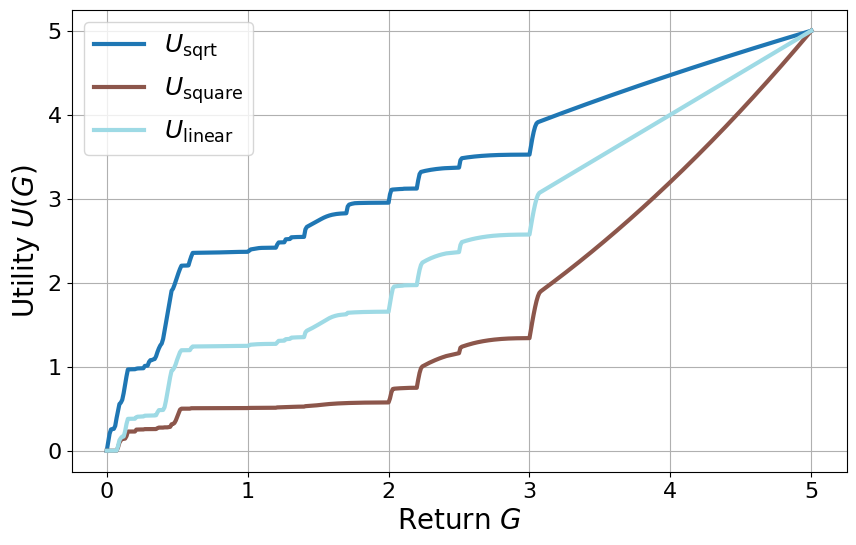

step size: 100
suboptimalities: ['U_sqrt, 0.078', 'U_square, 0.07', 'U_linear, 0.071']


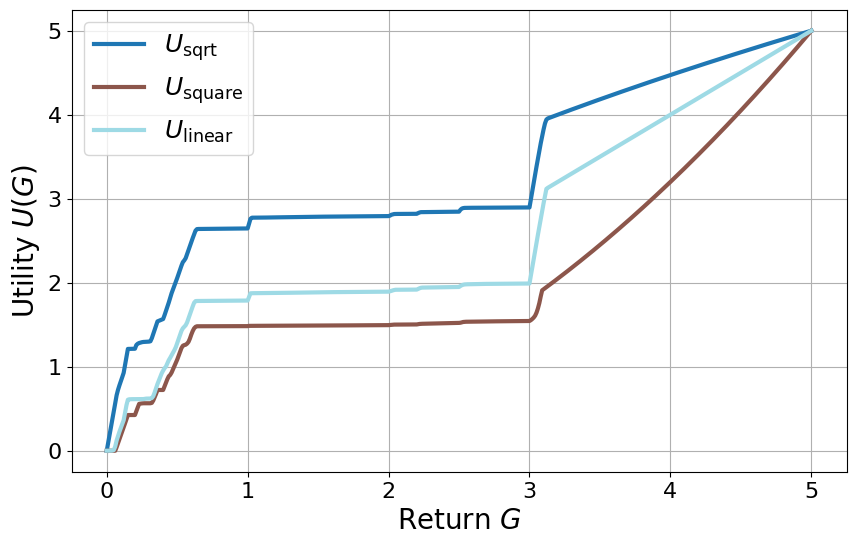

step size: 1000
suboptimalities: ['U_sqrt, 0.076', 'U_square, 0.078', 'U_linear, 0.08']


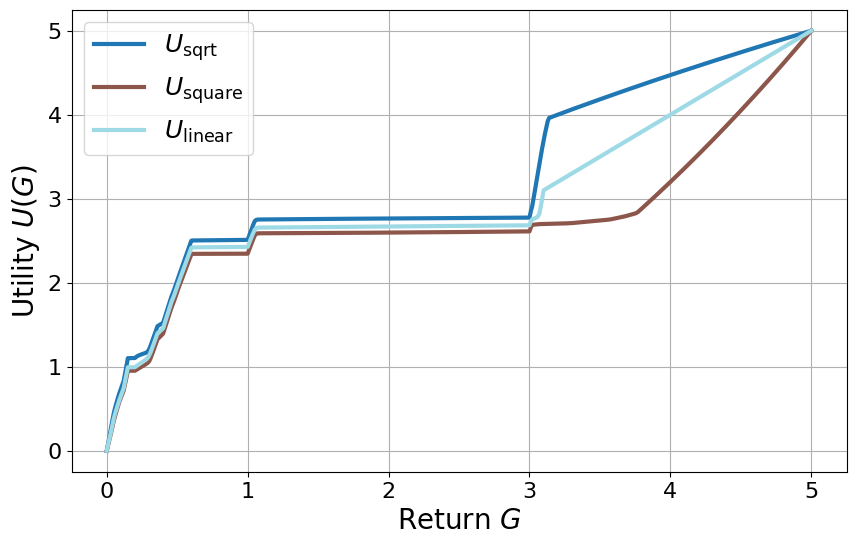

step size: 10000
suboptimalities: ['U_sqrt, 0.19', 'U_square, 0.18', 'U_linear, 0.15']


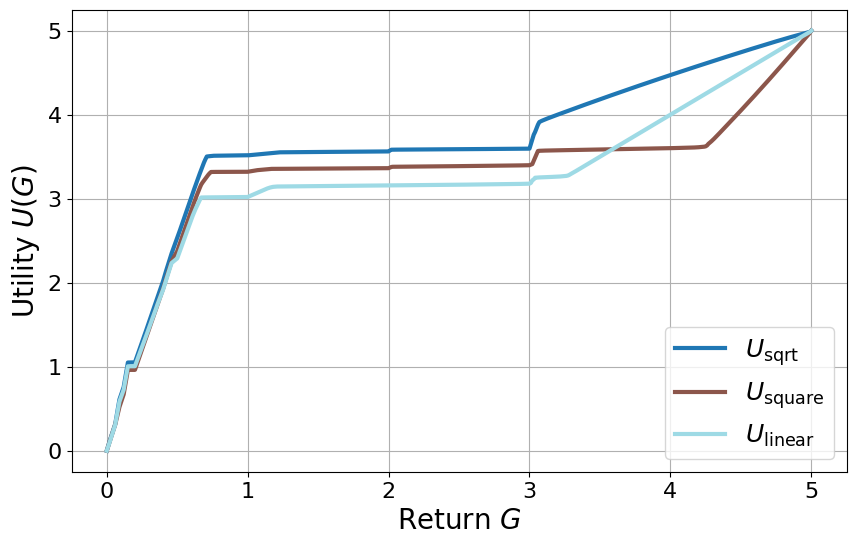

In [2]:
# choose seed
seed = '0'

# loop over learning rate
for alpha in alphas:
    Us = []
    subopts = []
    # loop over utilities
    for ut in utils:
        # if more than 70 iterations, use 70th utility extracted
        final_path_u_list = path+'/u_list_L_'+ut+'_'+alpha+'_'+seed+'.npy'
        u_list = np.load(final_path_u_list, allow_pickle=True)
        if len(u_list) > 70:
            # make the average without the 71st utility
            Us.append(np.mean(np.stack(u_list[:70], axis=0), axis=0))
        else:
            # simply append the found utility
            final_path_U = path+'/U_L_'+ut+'_'+alpha+'_'+seed+'.npy'
            Us.append(np.load(final_path_U, allow_pickle=True))

        # append the corresponding suboptimality
        final_path_subopt = path+'/subopts_L_'+ut+'_'+alpha+'_'+seed+'.npy'
        subopts.append(np.load(final_path_subopt, allow_pickle=True)[-1])

    print('step size: '+alpha)
    print('suboptimalities: '+str(['U_'+ut+', '+ '{:.2}'.format(sub) 
                        for ut, sub in zip(utils,subopts)]))

    # plot
    plot_utilities(
        U=Us,
        labels=[r'$U_{\text{'+ut+r'}}$' for ut in utils],
        savefig=True,
        namefig='results/plots/plot 1/utilities_'+alpha
    )

# Plot 2: Show the sequence of utilities extracted per iteration

For a certain seed, for each learning rate, for each initial
utility considered, we plot $n$ utilities extracted during the optimization
phase at different iterations.

utility: sqrt, step size: 0.01


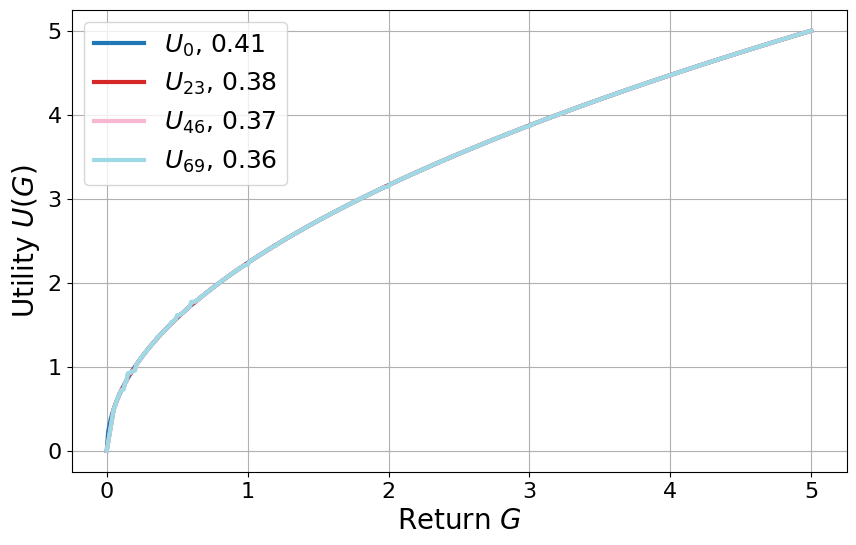

utility: sqrt, step size: 0.5


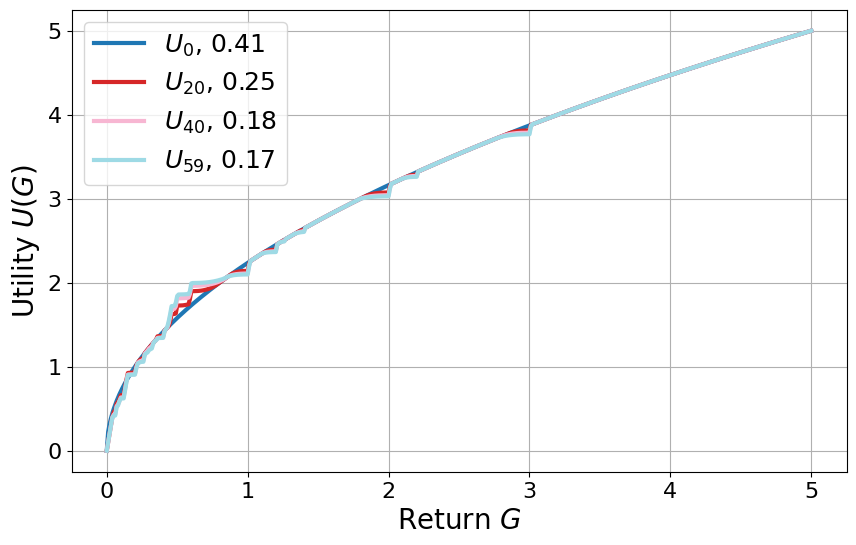

utility: sqrt, step size: 5


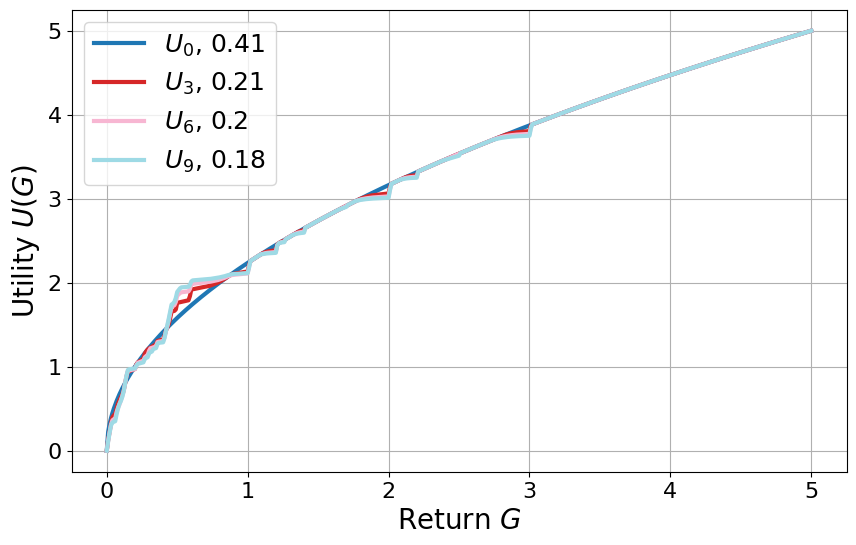

utility: sqrt, step size: 100


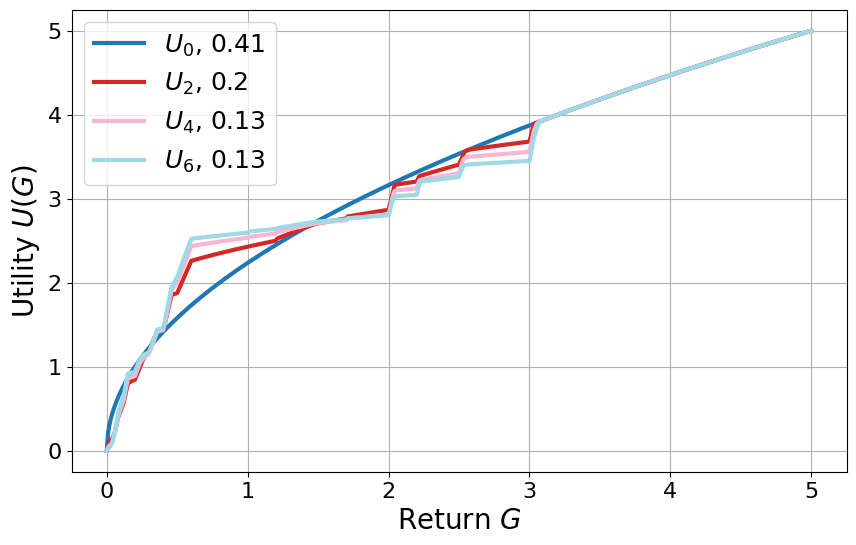

utility: sqrt, step size: 1000


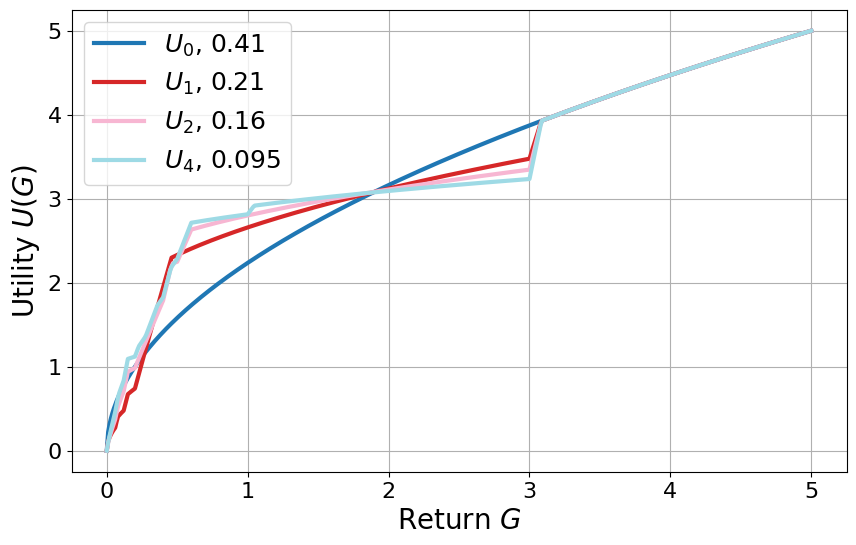

utility: sqrt, step size: 10000


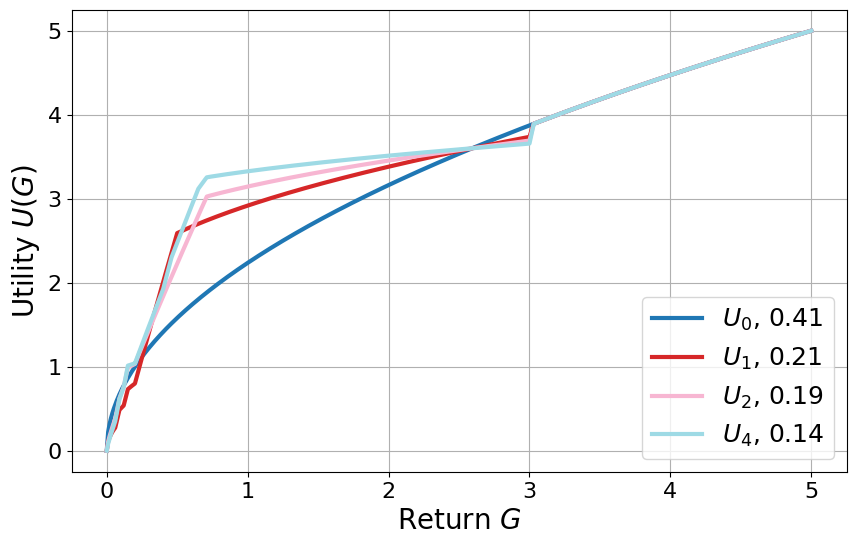

utility: square, step size: 0.01


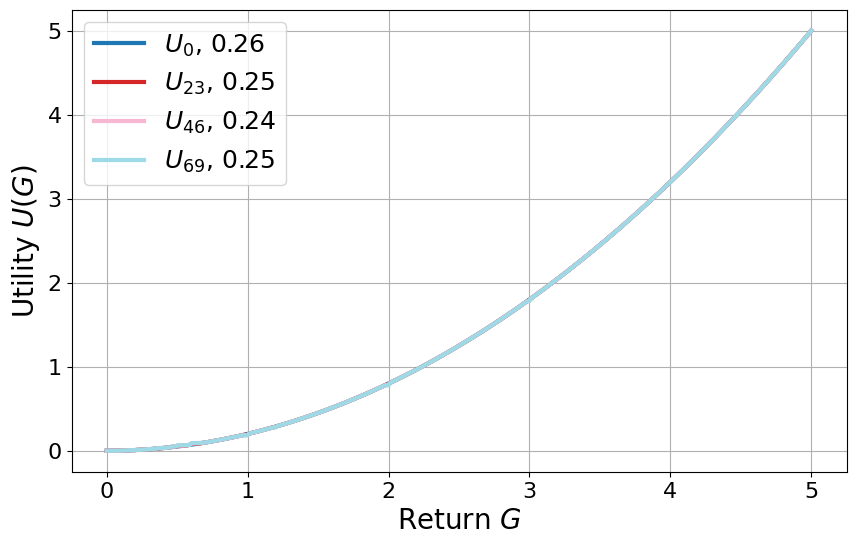

utility: square, step size: 0.5


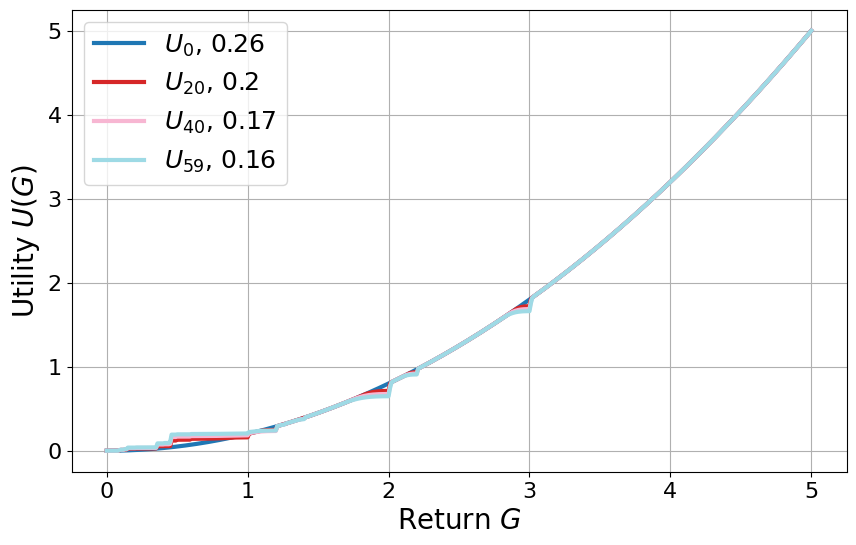

utility: square, step size: 5


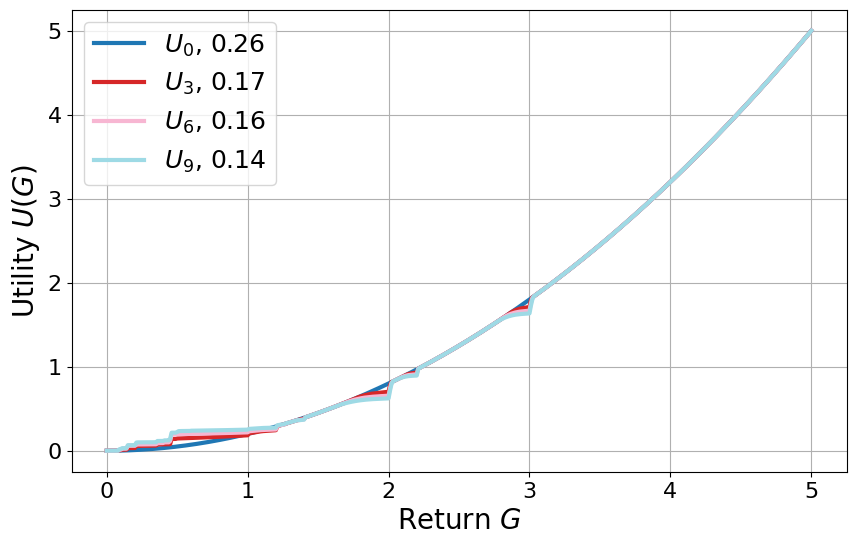

utility: square, step size: 100


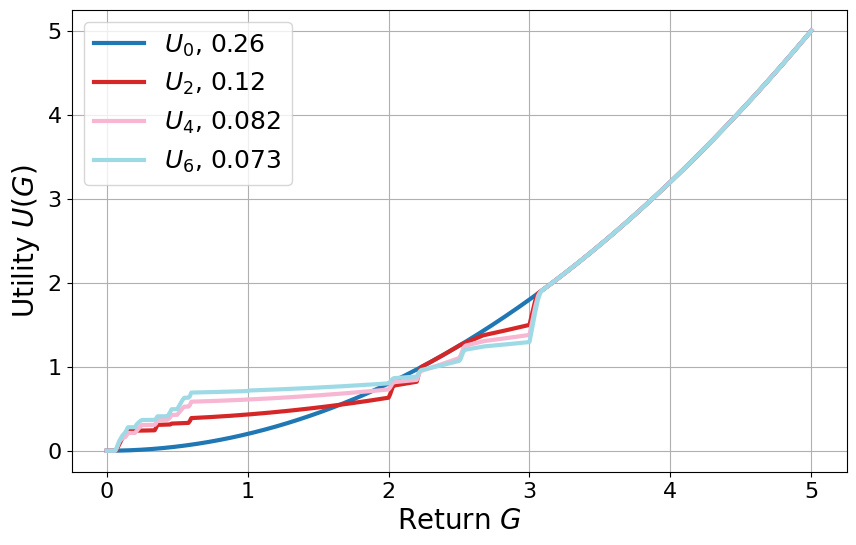

utility: square, step size: 1000


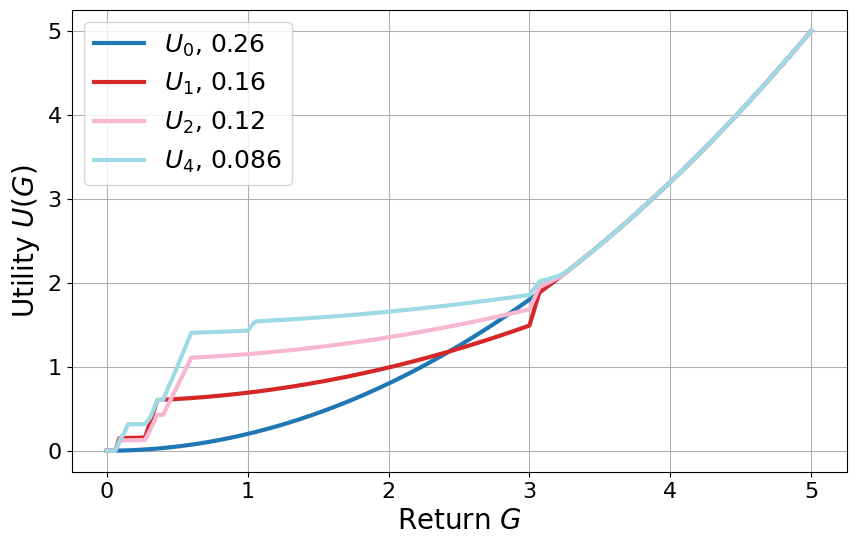

utility: square, step size: 10000


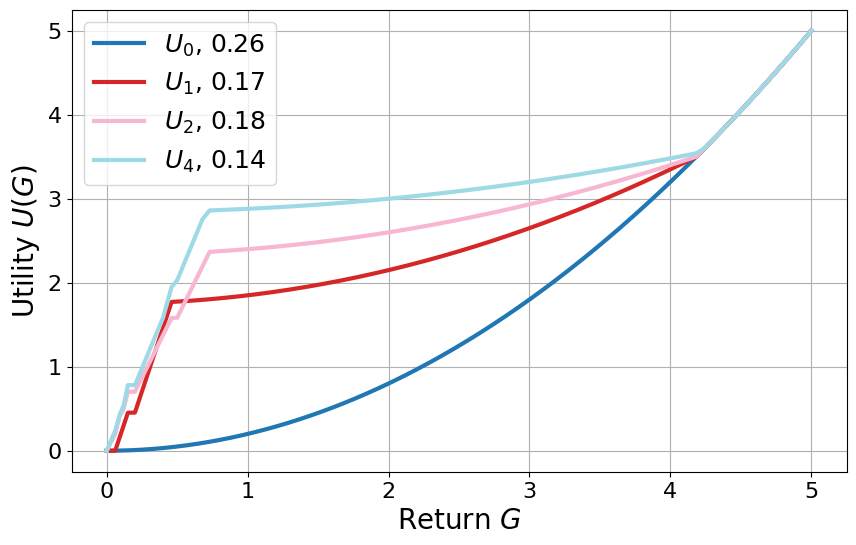

utility: linear, step size: 0.01


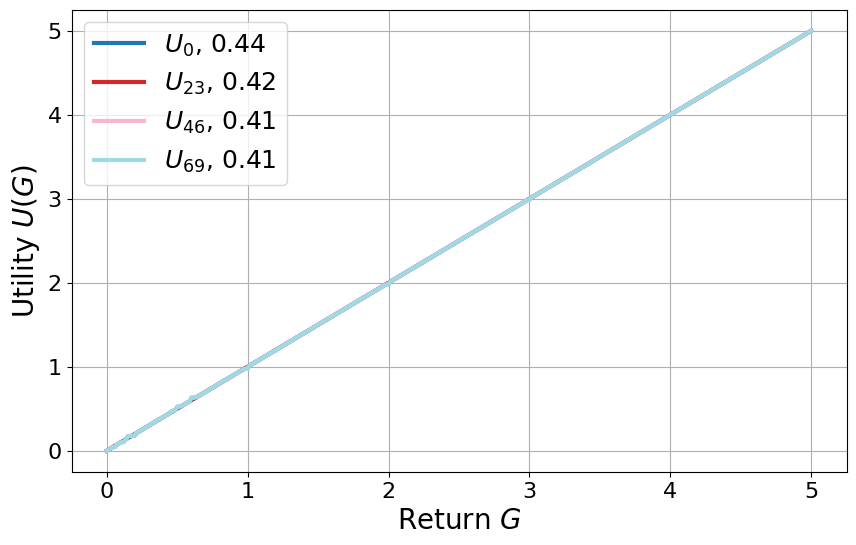

utility: linear, step size: 0.5


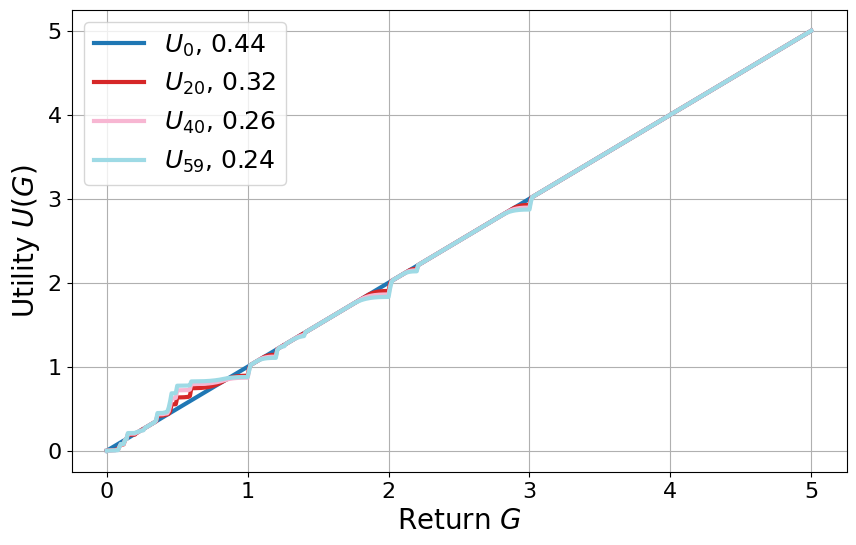

utility: linear, step size: 5


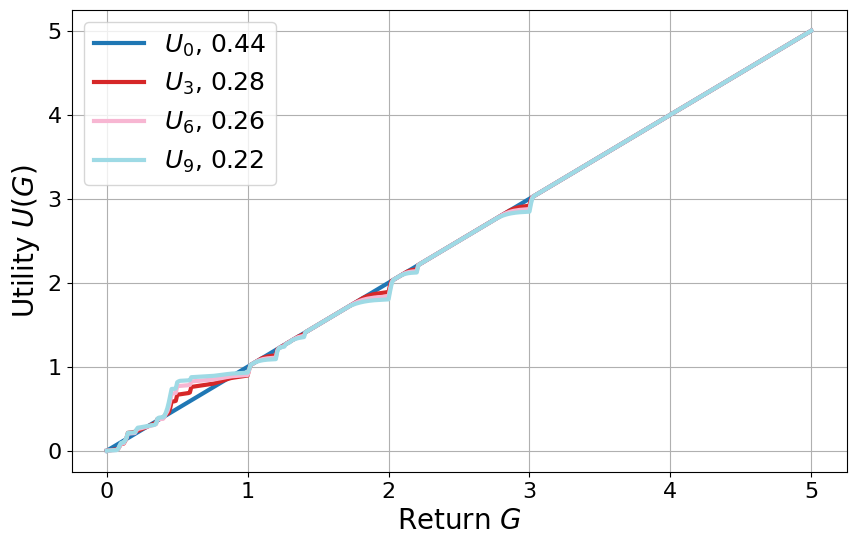

utility: linear, step size: 100


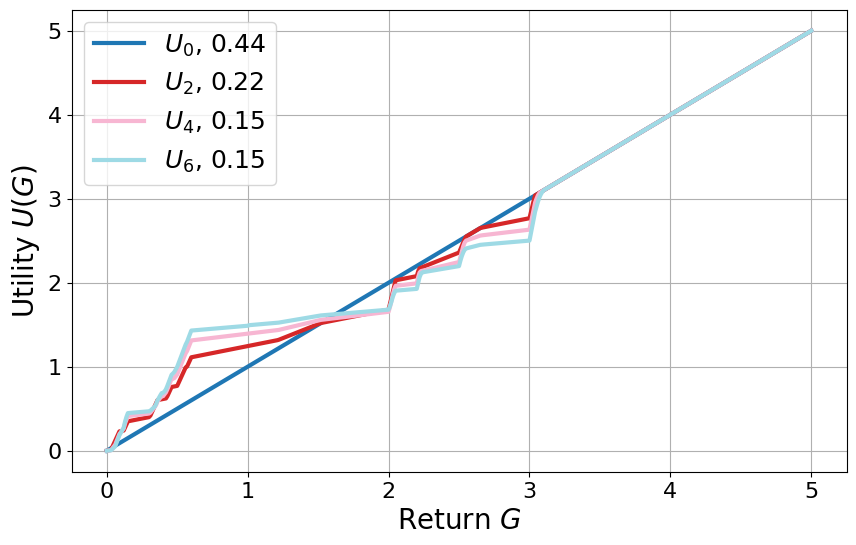

utility: linear, step size: 1000


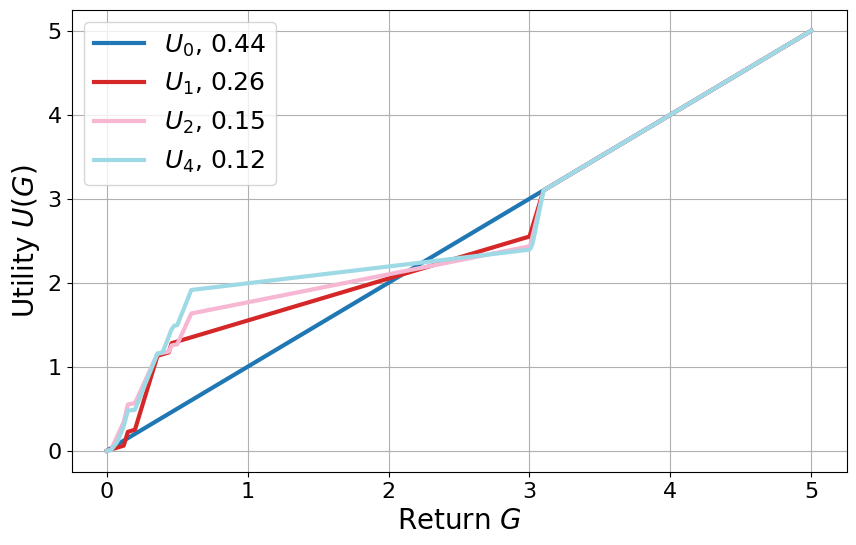

utility: linear, step size: 10000


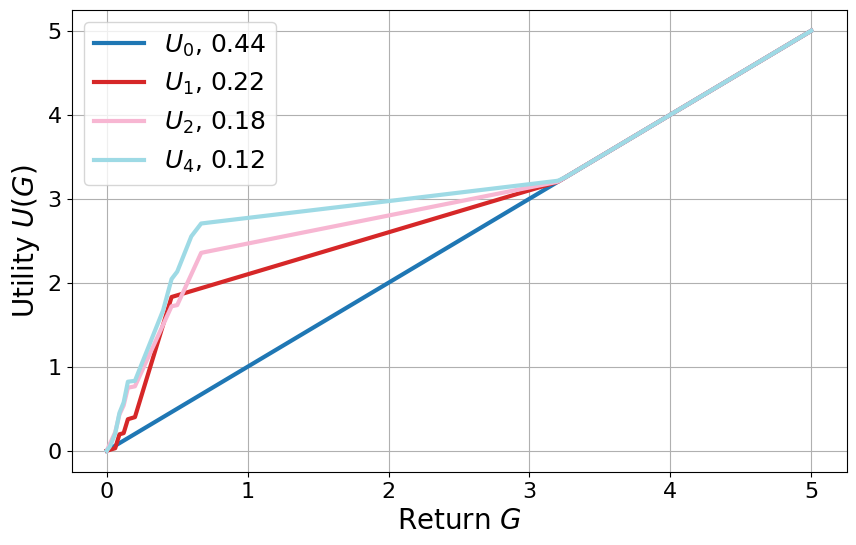

In [3]:
# number of utilities to show
n = 4

# number of steps to consider (at most 70)
first_steps = {
    '0.01': 70,
    '0.5': 60,
    '5': 10,
    '100': 7,
    '1000': 5,
    '10000': 5,
}

# choose seed
seed = '0'

# loop over utilities
for ut in utils:

    # loop over learning rate
    for alpha in alphas:

        # number of steps to consider
        n_steps = first_steps[alpha]

        # get utilities and suboptimalities
        final_path_u_list = path+'/u_list_L_'+ut+'_'+alpha+'_'+seed+'.npy'
        # if more than 70 iterations, keep the first 70 utilities extracted
        u_list = np.load(final_path_u_list, allow_pickle=True)[:n_steps]
        final_path_subopt = path+'/subopts_L_'+ut+'_'+alpha+'_'+seed+'.npy'
        suboptimalities = np.load(final_path_subopt, allow_pickle=True)[:n_steps]

        # take the n utilities to plot uniformly
        number = len(u_list)
        n_utils = n if n <= number else number                
        interval = number // (n_utils-1)
        # append first n_utils-1
        idxes = [i*interval for i in range(n_utils-1)]
        list(range(0, number, interval))
        # append last number idx
        idxes += [number-1]
        
        # construct utilities and subopts lists with correct items
        Us = []
        subopts = []
        for i in idxes:
            # tractor requires the average utility
            Us.append(np.mean(np.stack(u_list[:i+1], axis=0), axis=0))
            subopts.append(suboptimalities[i])

        print('utility: '+ut+', step size: '+alpha)

        # plot
        plot_utilities(
            U=Us,
            labels=['$U_{'+str(i)+'}$, '+ '{:.2}'.format(sub) if sub>=0 else 
                    '$U_{'+str(i)+'}$'+r'$\approx 0$'
                            for i, sub in zip(idxes,subopts)],
            savefig=True,
            namefig='results/plots/plot 2/'+ut+'_'+alpha
        )

# Plot 3: Compare the trend of (non)compatibilities based on the learning rate

For every initial utility, based on the learning rate, on
average over the different simulations (seeds), we plot the sequence of
(non)compatibilities corresponding to the extracted utilities during the
optimization phase.

Utility: sqrt


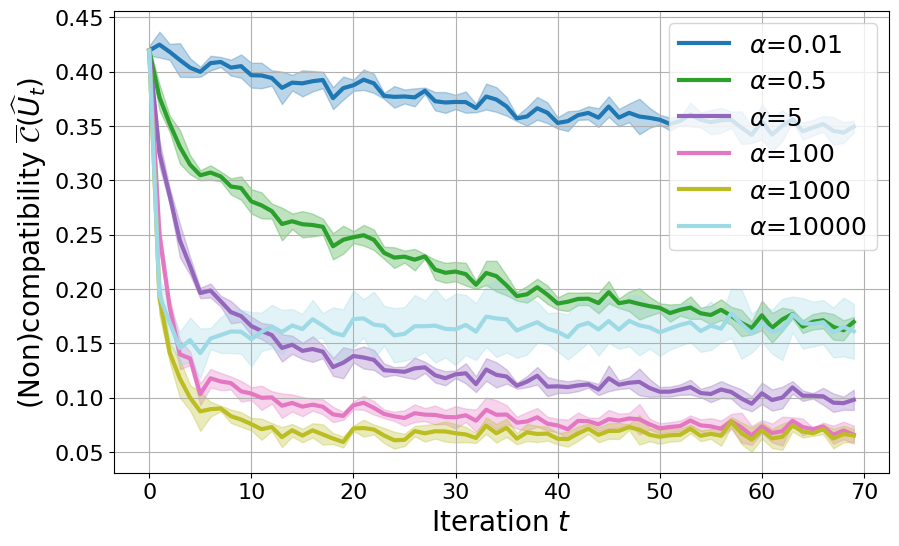

Utility: square


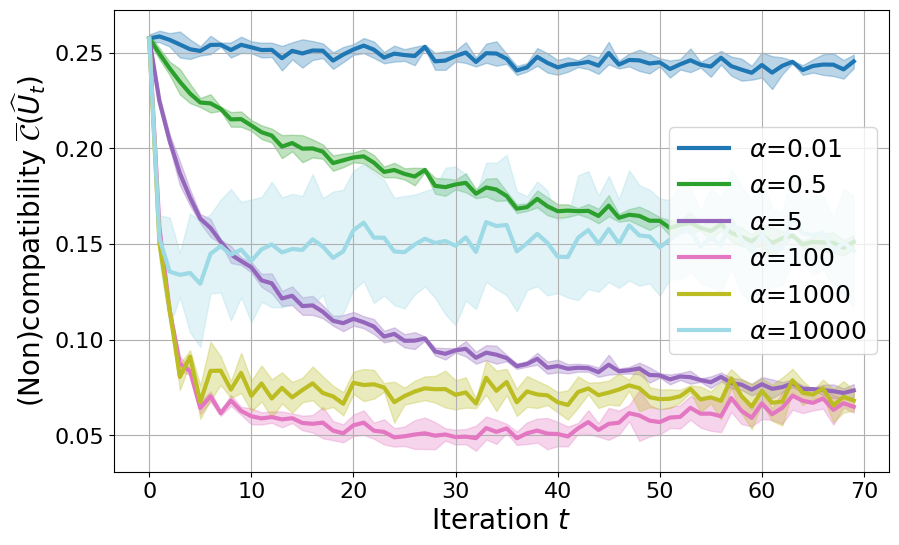

Utility: linear


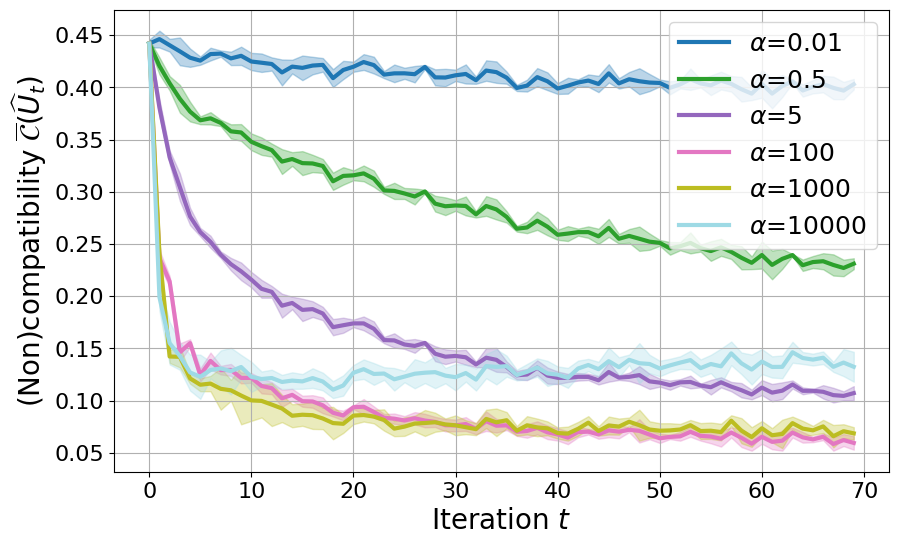

In [4]:
# loop over utilities
for ut in utils:
    subopts_mean = []
    subopts_std = []
    # loop over learning rates
    for alpha in alphas:
        subopts = []
        # compute maximum length of suboptimalities over seeds
        max_len = -np.inf
        # loop over the seeds
        for seed in seeds:
            # get suboptimalities
            final_path_subopt = path+'/subopts_L_'+ut+'_'+alpha+'_'+seed+'.npy'
            subs = np.load(final_path_subopt, allow_pickle=True)
            # replace potential negative values with 0
            subs[subs < 0] = 0
            subopts.append(subs)
            # update max_len
            if len(subs) > max_len:
                max_len = len(subs)
        # reshape subopts
        subopts2 = []
        for s in subopts:
            if len(s) == max_len:
                subopts2.append(s)
            else:
                new_s = np.zeros(max_len)
                new_s[:len(s)] = s
                subopts2.append(new_s)

        # compute average and std
        subopts_mean.append(np.mean(subopts2, axis=0))
        subopts_std.append(np.std(subopts2, axis=0))

    print('Utility: '+ut)

    # plot
    plot_suboptimalities(
        subopts=subopts_mean,
        subopts_std=subopts_std,
        labels=[r'$\alpha$='+alpha for alpha in alphas],
        savefig=True,
        namefig='results/plots/plot 3/'+ut
    )

# Plot 4: Explain the use of large learning rates

We now draw some plots to show that very large learning rates are needed to
obtain non-neglectable update steps.

In [5]:
# set number of trajectories
n_traj = 10000

# set initial utility
U0 = get_utility('sqrt', M.M.H, M.d)

# estimate expert return distribution
piE = policies[9]
etaE = M.estimate_return_distribution(piE, n_traj)

# estimate optimal policy return distribution
pi_star = M.compute_optimal_policy(U0)
eta_star = M.estimate_return_distribution(pi_star, n_traj)

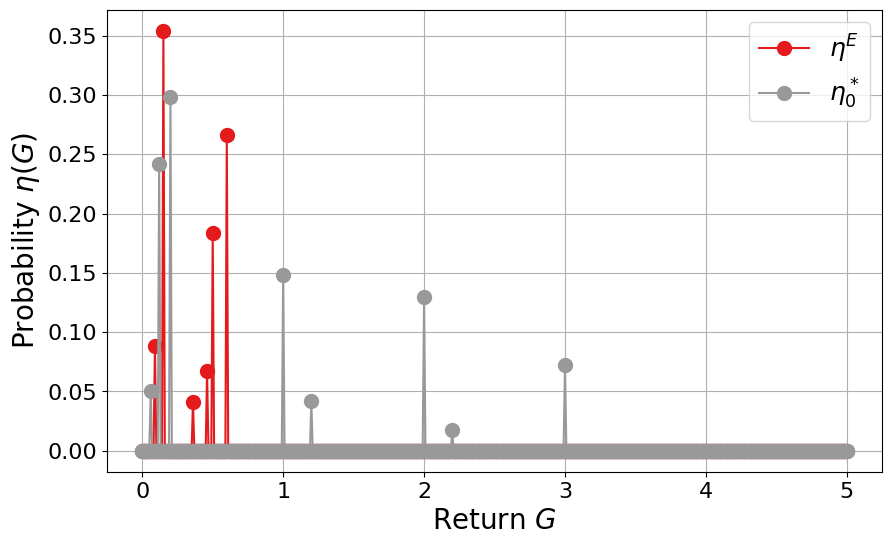

In [6]:
# plot the return distributions
plot_return_distributions(
    etas=[etaE, eta_star],
    labels=['$\eta^E$', '$\eta^*_0$'],
    savefig=True,
    namefig='results/plots/plot 4/return distributions'
)

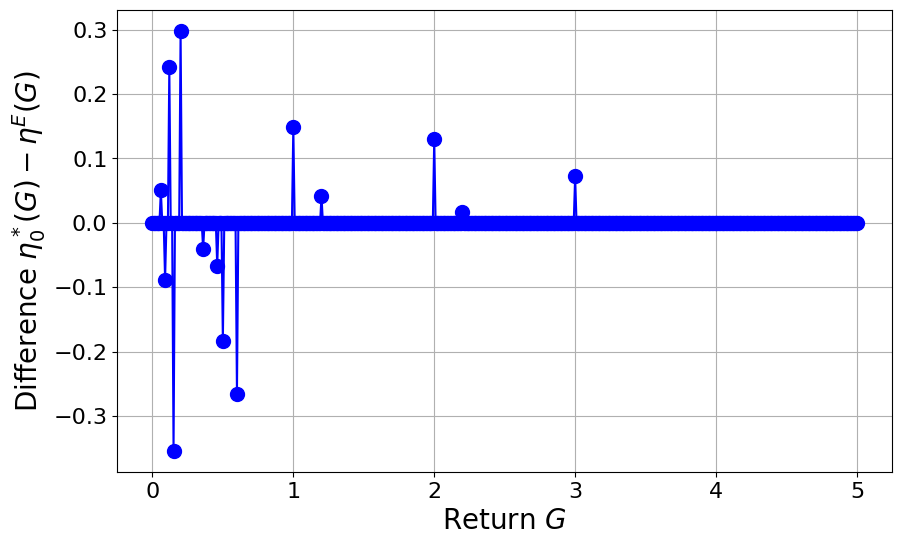

In [7]:
# plot the difference of return distributions
plot_difference_return_distributions(
    delta=eta_star-etaE,
    difference_name='\eta^*_0(G)-\eta^E(G)',
    savefig=True,
    namefig='results/plots/plot 5/delta return distributions'
)

learning rate: 0.01


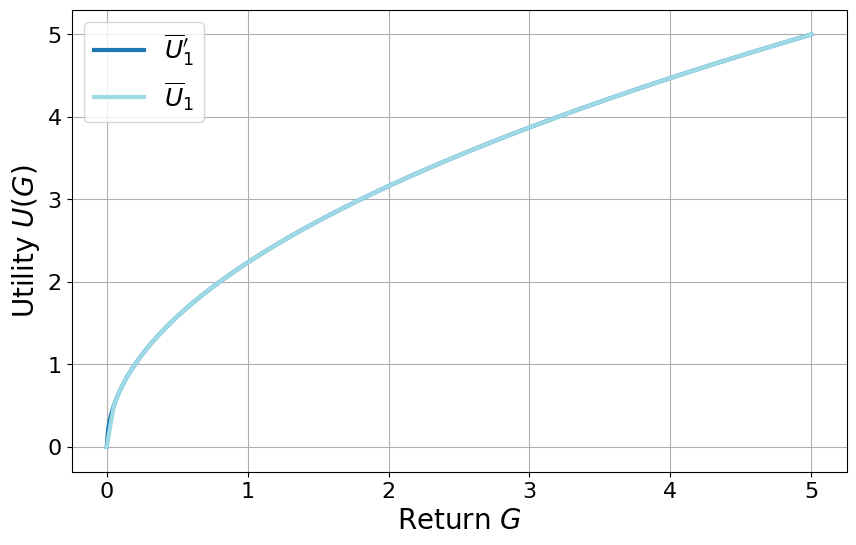

learning rate: 0.5


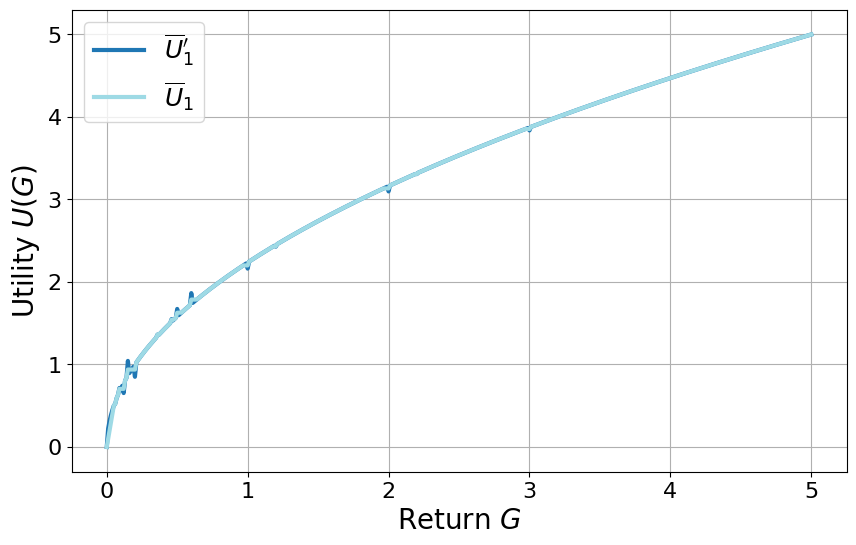

learning rate: 5


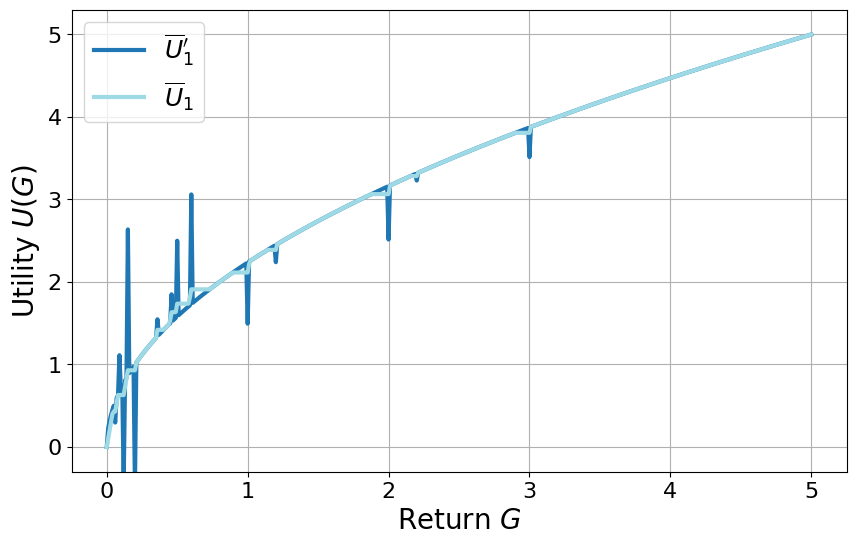

learning rate: 100


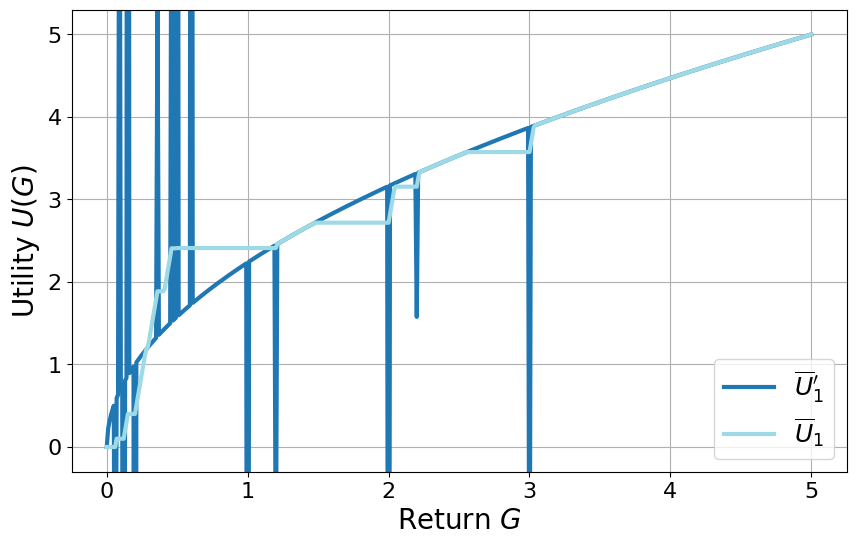

learning rate: 1000


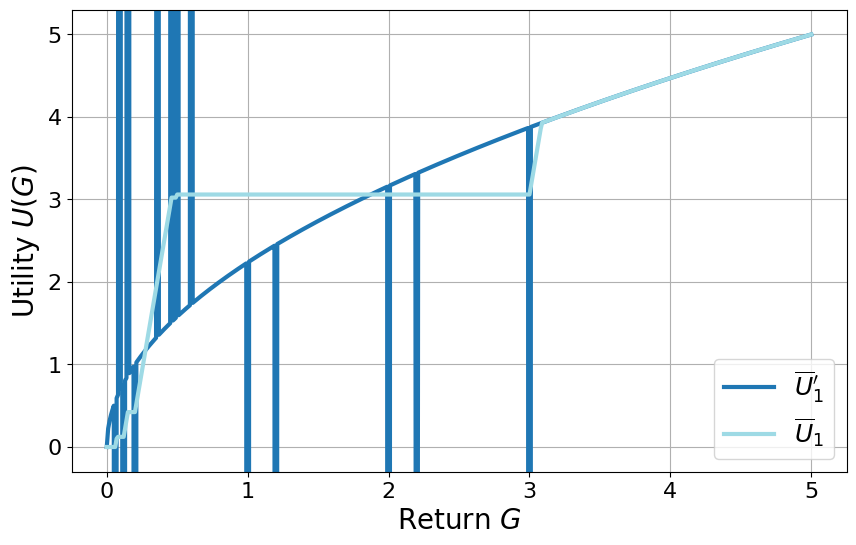

learning rate: 10000


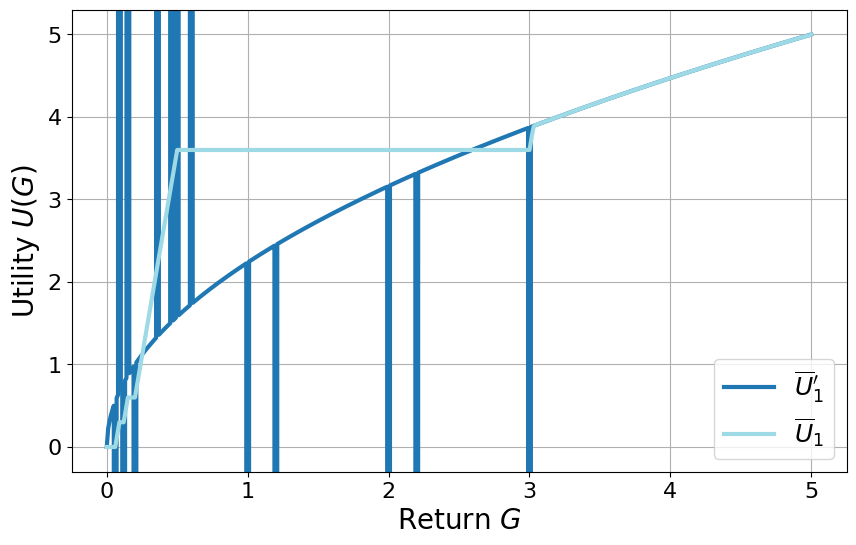

In [8]:
# parameters
L = 10

# lists with optimal return distributions
etas_star_proj = []

# loop over learning rates
for alpha in alphas:
    # update no projection
    U1 = U0 - float(alpha)*(eta_star-etaE)

    # project
    U1_proj = project(
        U=U1,
        H=M.M.H,
        L=L,
        eps0=M.eps0,
        use_lipschitz=True
    )

    # find optimal return distribution
    pi1_proj = M.compute_optimal_policy(U1_proj)
    eta1_proj = M.estimate_return_distribution(pi1_proj, n_traj)
    etas_star_proj.append(eta1_proj)

    print('learning rate: '+alpha)

    # plot
    plot_utilities(
        # U=[U0, U1, U1_proj],
        U=[U1, U1_proj],
        # labels=[r"$\overline{U}_0$", r"$\overline{U}_1'$", r"$\overline{U}_1$"],
        labels=[r"$\overline{U}_1'$", r"$\overline{U}_1$"],
        ylim=True,
        savefig=True,
        namefig='results/plots/plot 4/utilities_'+alpha
    )

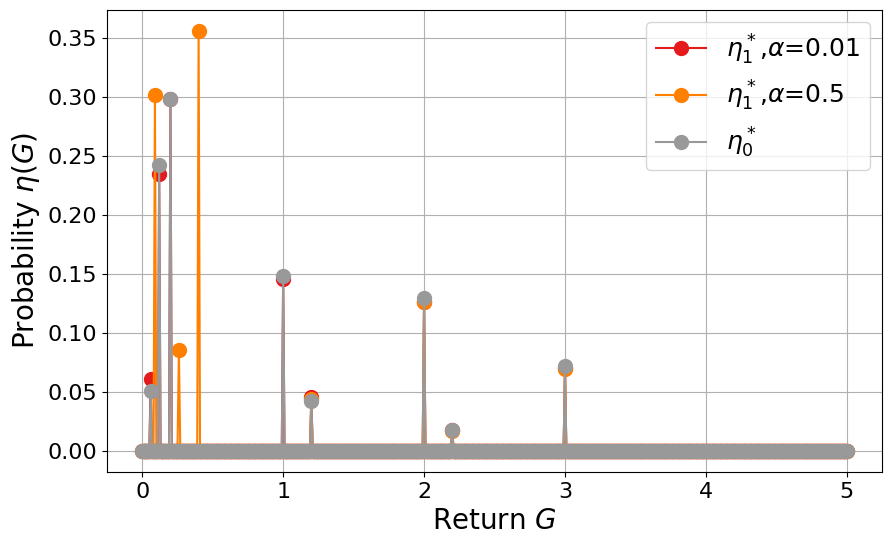

In [9]:
# plot eta star with eta < 5
plot_return_distributions(
    etas=etas_star_proj[:2]+[eta_star],
    labels=['$\eta^*_1$,'+r'$\alpha$='+alpha for alpha in alphas[:2]]+['$\eta^*_0$'],
    savefig=True,
    namefig='results/plots/plot 4/eta_star_eta_less_5'
)

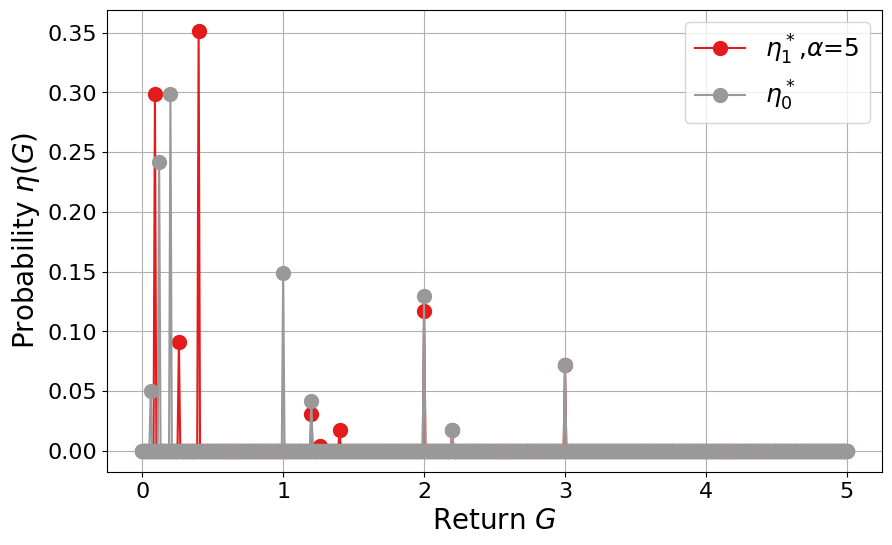

In [10]:
# plot eta star with eta 5
plot_return_distributions(
    etas=etas_star_proj[2:3]+[eta_star],
    labels=['$\eta^*_1$,'+r'$\alpha$='+alpha for alpha in alphas[2:3]]+['$\eta^*_0$'],
    savefig=True,
    namefig='results/plots/plot 4/eta_star_eta_5'
)

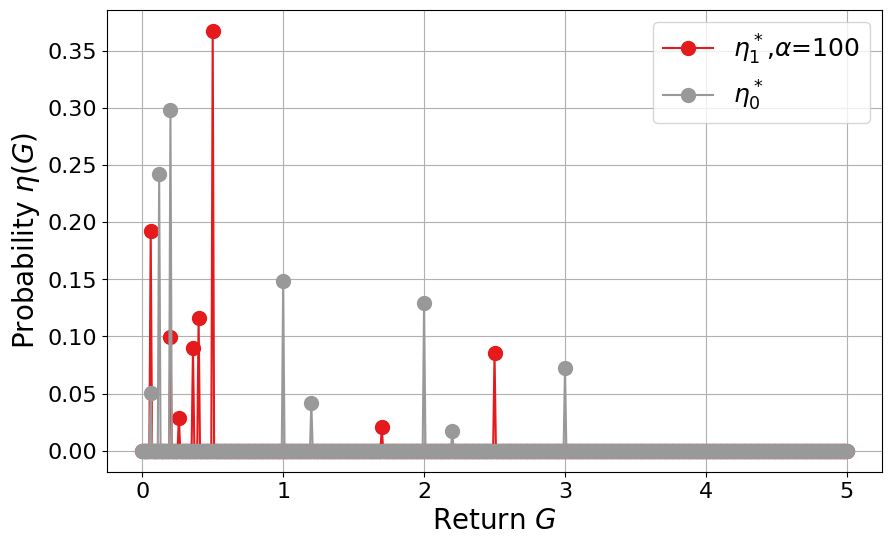

In [11]:
# plot eta star with eta 100
plot_return_distributions(
    etas=etas_star_proj[3:4]+[eta_star],
    labels=['$\eta^*_1$,'+r'$\alpha$='+alpha for alpha in alphas[3:4]]+['$\eta^*_0$'],
    savefig=True,
    namefig='results/plots/plot 4/eta_star_eta_100'
)

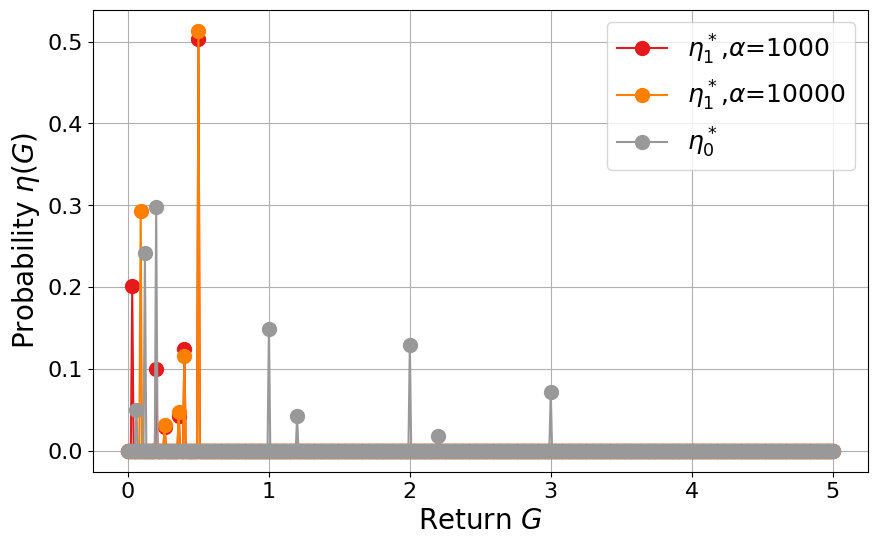

In [12]:
# plot eta star with eta 1000, 10000
plot_return_distributions(
    etas=etas_star_proj[4:6]+[eta_star],
    labels=['$\eta^*_1$,'+r'$\alpha$='+alpha for alpha in alphas[4:6]]+['$\eta^*_0$'],
    savefig=True,
    namefig='results/plots/plot 4/eta_star_eta_greater_100'
)

# Plot 5: Compare the return distributions of the participants

Plot the return distributions of the participants to highlight differences and similarities.

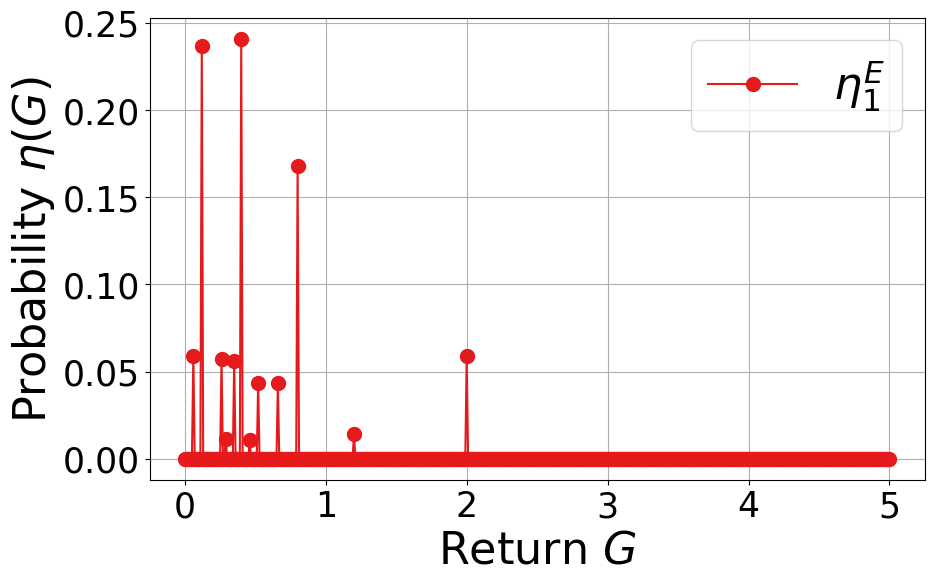

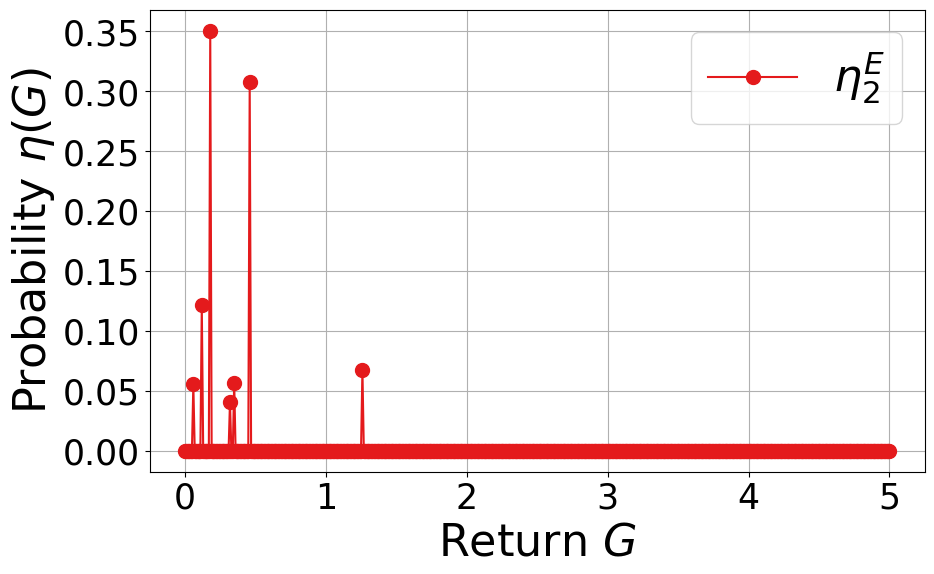

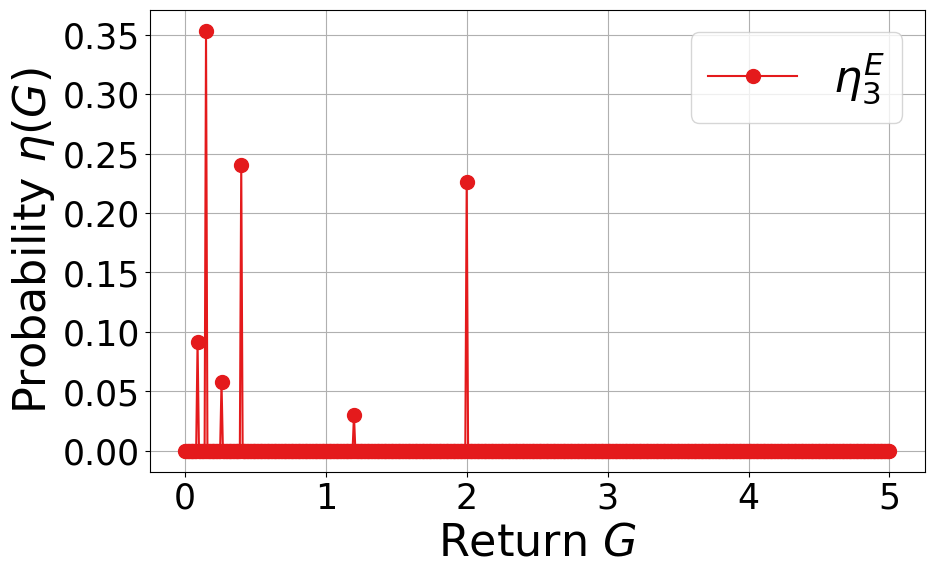

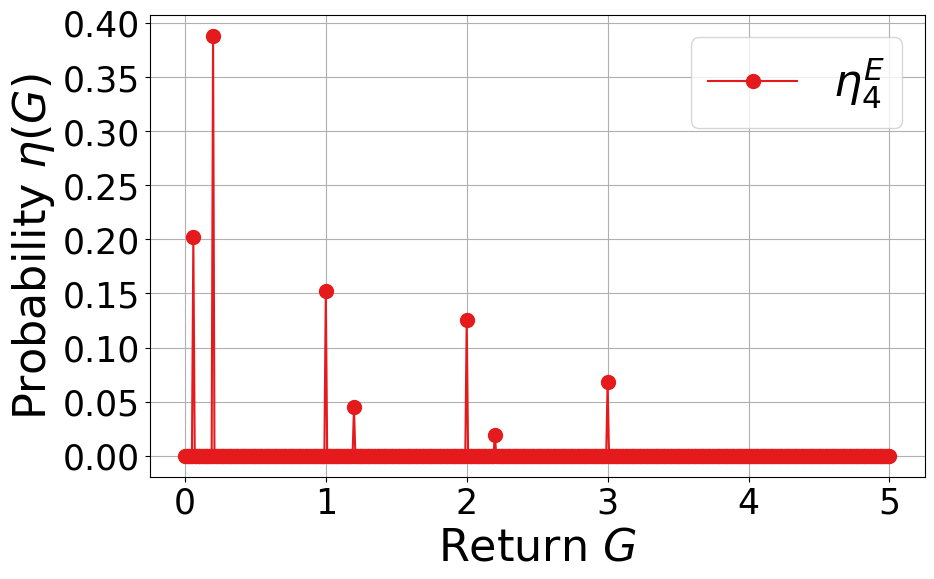

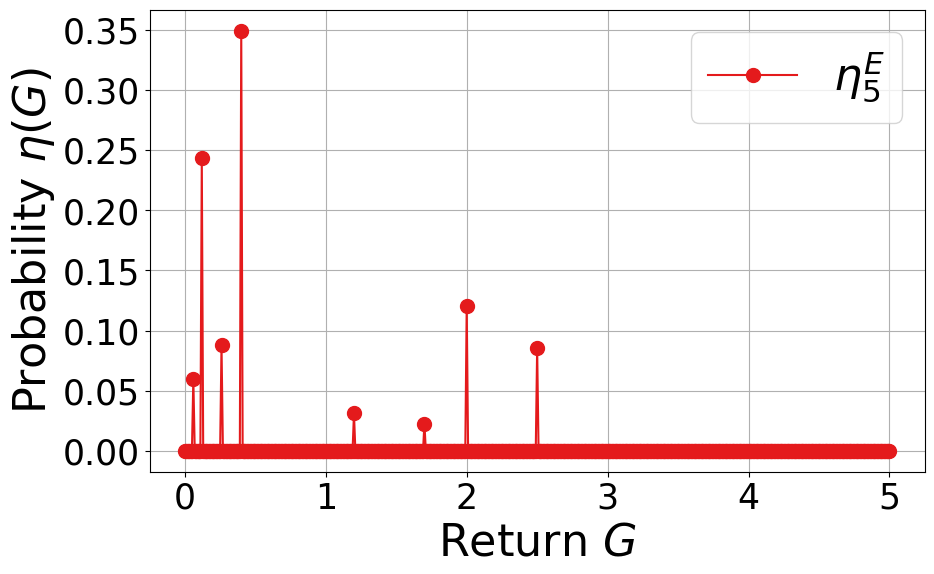

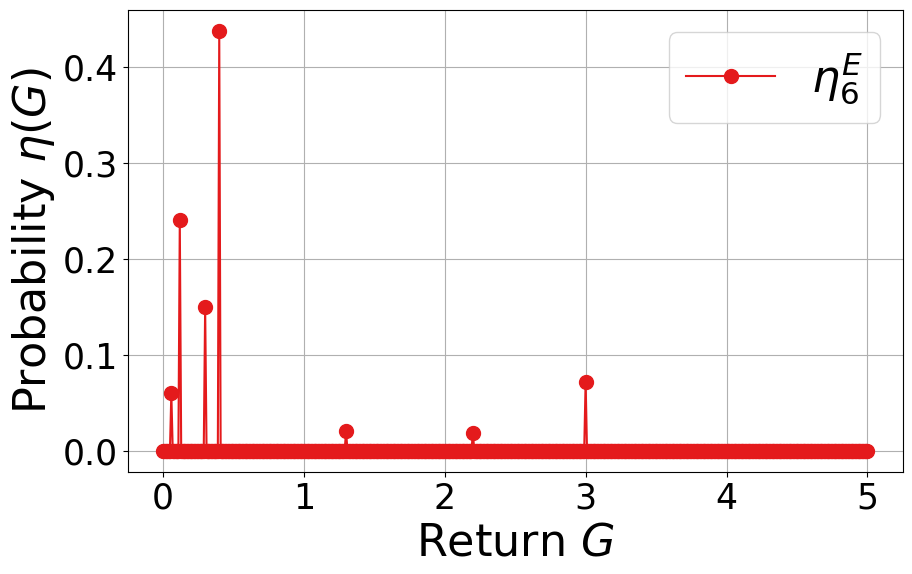

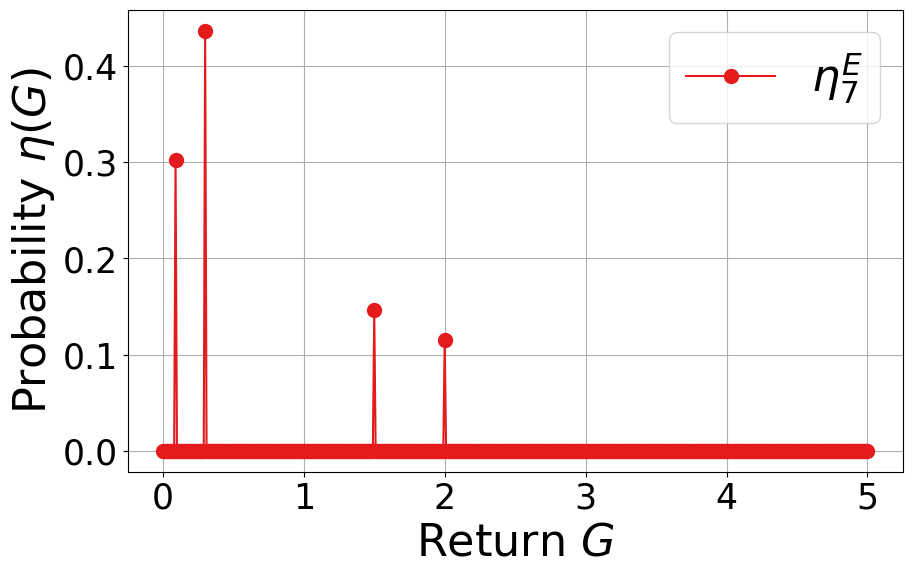

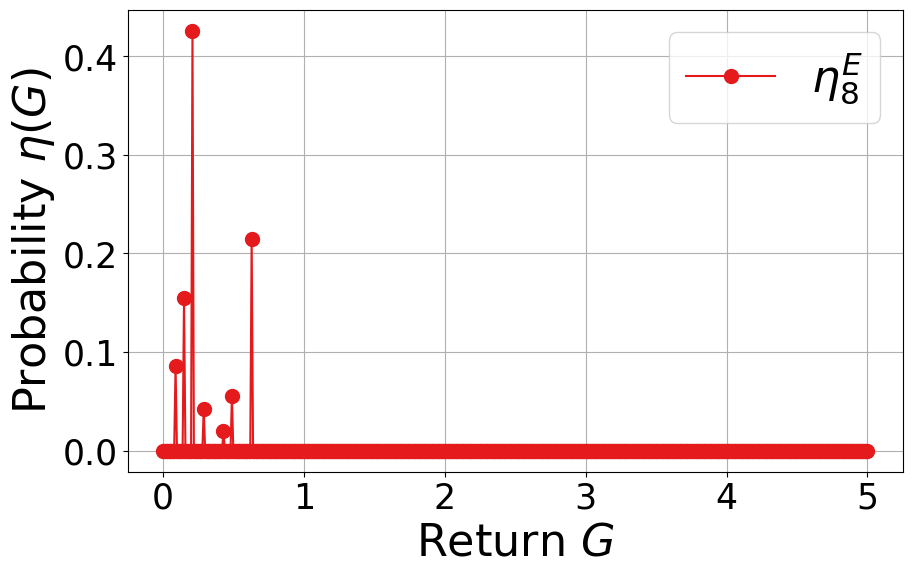

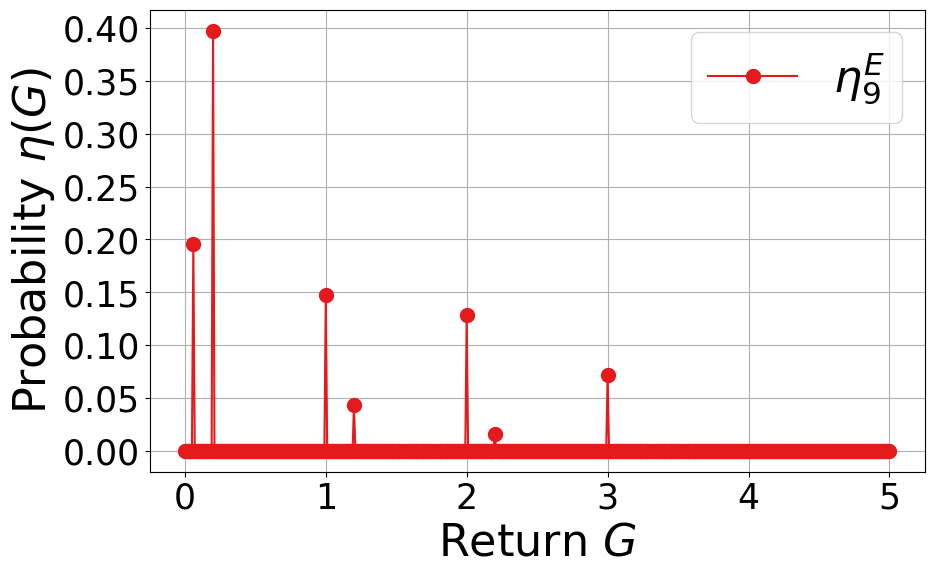

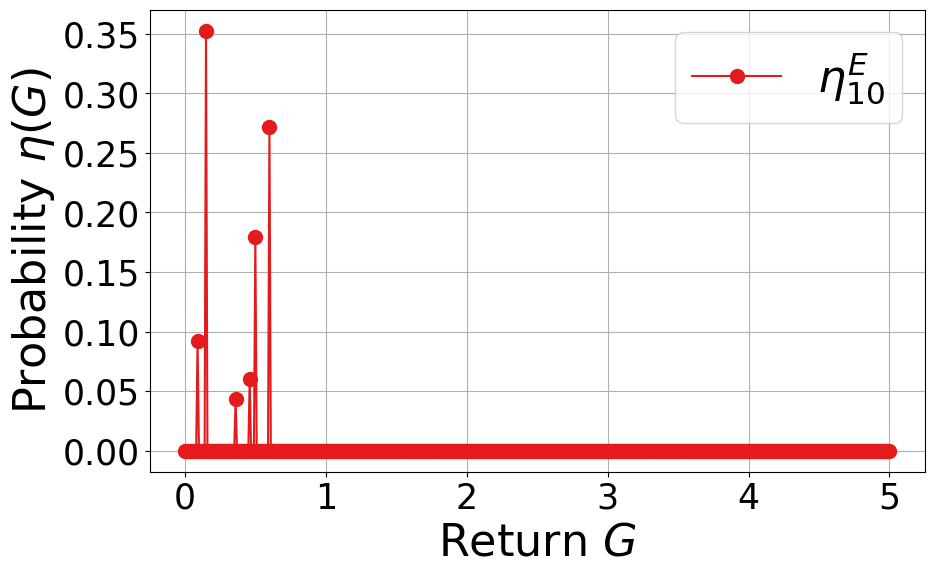

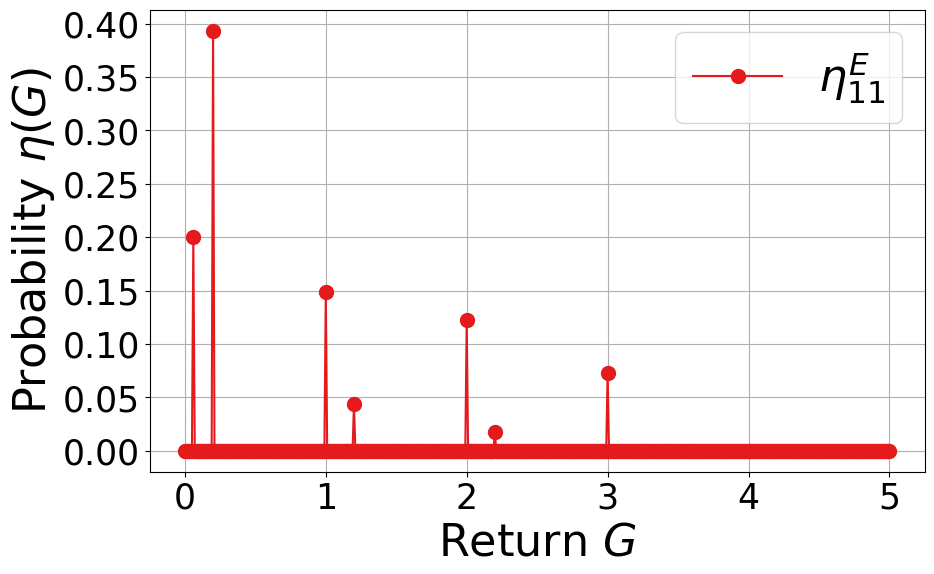

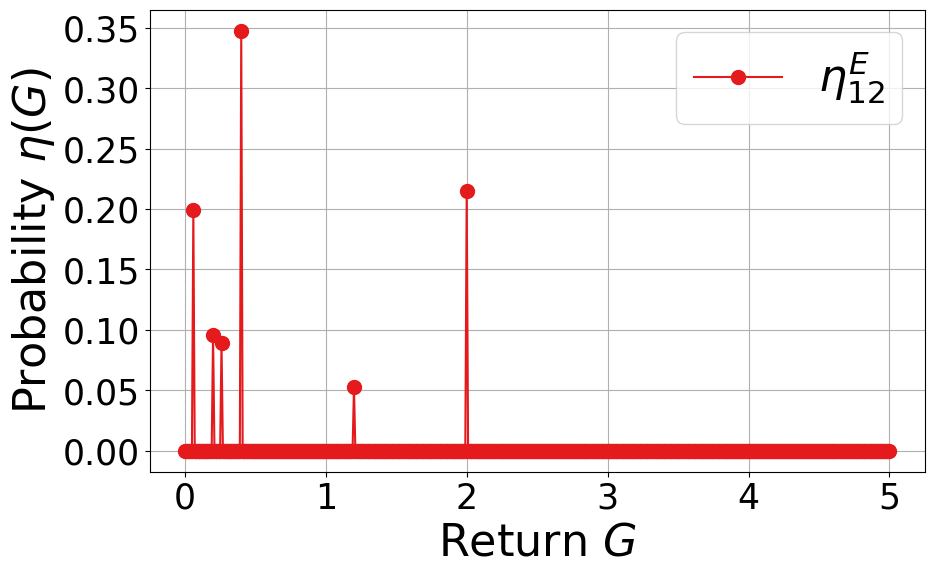

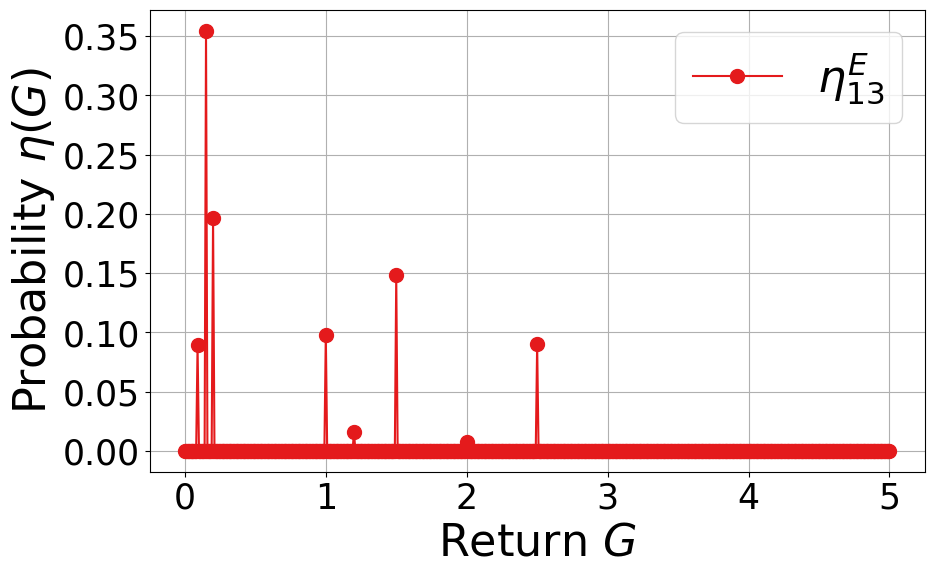

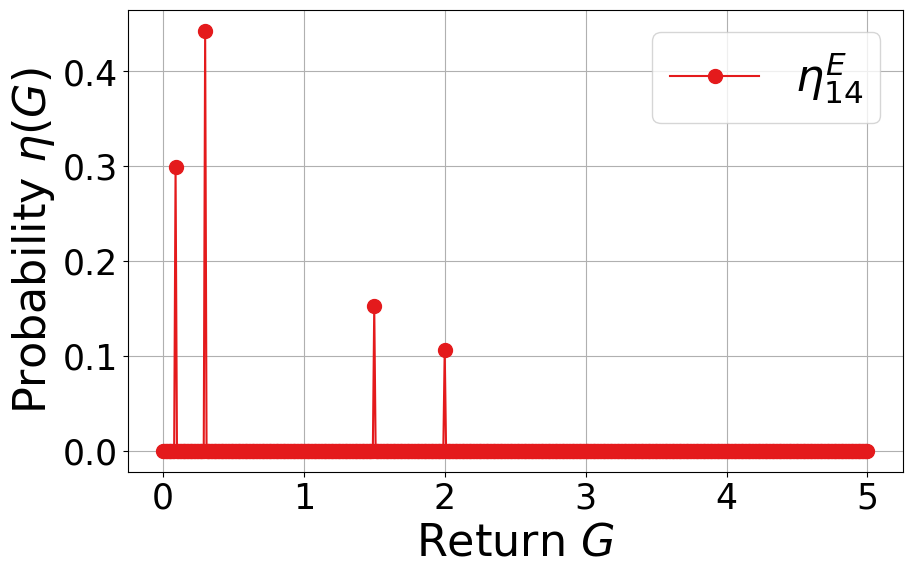

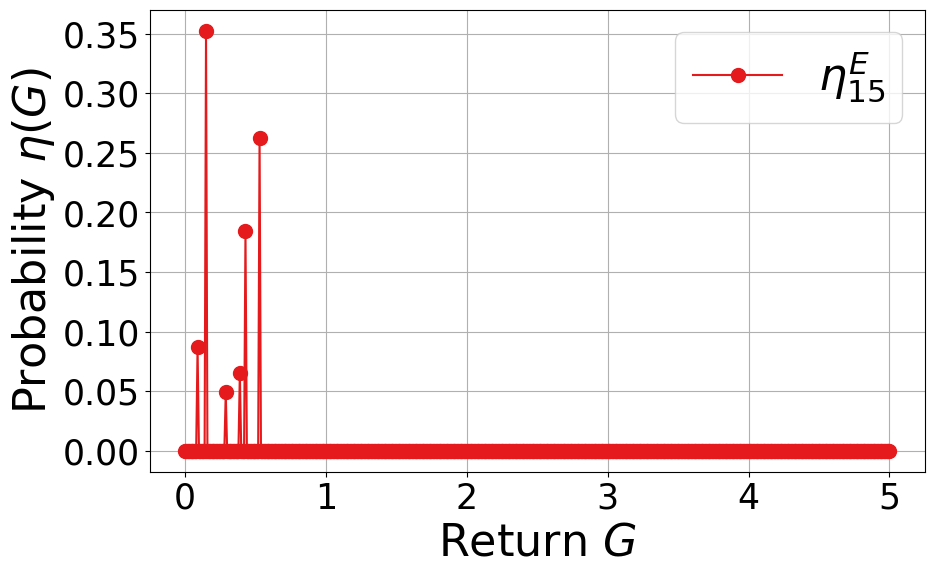

In [23]:
# set number of trajectories
n_traj = 10000

# loop over participants
for i in range(15):
    # estimate expert return distribution
    piE = policies[i]
    etaE = M.estimate_return_distribution(piE, n_traj)

    # plot
    plot_return_distributions(
    etas=[etaE],
    labels=['$\eta^E_{'+str(i+1)+'}$'],
    huge_text=True,
    savefig=True,
    namefig='results/plots/plot 5/etaE_'+str(i+1)
)